# Analysis examples for DANRA reanalysis in zarr storage format

*Updated: 2024-01-18, Leif Denby (lcd@dmi.dk)*

This notebook demonstrates how to analyse the DANRA reanalysis data in zarr. The full DANRA data-collection is grouped in three parts, with data on: 1) height-levels, 2) pressure-levels and 3) single-levels (e.g. Earth's surface, top-of-atmosphere, column-integral properties)

In [ ]:
from pathlib import Path
import xarray as xr

version = "v0.3.0-rc1"
# path to copies of processed DANRA datasets on scale.dmi.dk:
# fp_root = Path(f"/dmidata/projects/cloudphysics/danra/data/{version}")
# path on ohm.dmi.dk where the files where processed:
fp_root = Path(f"/nwp/danra/data/{version}")

: 

In [2]:
# lets have a quick look at the files of the dataset
!ls -l {fp_root}

total 4468
-rw-rw-r--  1 lcd g_file_nwpml 4570859 Feb 12 11:10 20240212T094559.704953.log
drwxrwsr-x 13 lcd g_file_nwpml     240 Feb 12 11:10 height_levels.zarr
-rw-rw-r--  1 lcd g_file_nwpml    1277 Feb 12 11:10 README.md


In [3]:
# we'll start by rendering the content of the README.md file inline here
import IPython.display as display

fp_readme = fp_root / "README.md"
with open(fp_readme, "r") as f:
    readme = f.read()
display.display(display.Markdown(readme))

# DANRA reanalysis Zarr data collection

**v0.3.0, created 2024-02-12T11:10:31**

time-span: 1990-09-01 to 2000-09-01

> All prognostic variables for 10-year period on reduced levels

## height levels

filename: `height_levels.zarr`

|                                            | 100   |
|:-------------------------------------------|:------|
| <abbr title='Relative humidity'>r</abbr>   | ✓     |
| <abbr title='Temperature'>t</abbr>         | ✓     |
| <abbr title='u-component of wind'>u</abbr> | ✓     |
| <abbr title='v-component of wind'>v</abbr> | ✓     |



<pre>
INSTALLED VERSIONS
------------------
commit: 7924a1bff4182594fa0feec0b80f3c4a0b47bc95
python: 3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]
python-bits: 64
OS: Linux
OS-release: 5.15.0-92-generic
machine: x86_64
hostname: ohm.dmi.dk
processor: x86_64
byteorder: little
LC_ALL: None
LANG: C.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.12.2
libnetcdf: 4.9.3-development

kerchunker: None
luigi: 3.4.0
dmidc: 0.4.1
xarray: 2023.12.0
pandas: 2.1.4
numpy: 1.26.2
scipy: 1.11.4
bottleneck: None
dask: 2024.1.1
distributed: 2024.1.1
fsspec: 2023.12.2
numba: 0.58.1
setuptools: 69.0.2
pip: 23.3.2
conda: None
pytest: None
mypy: None
IPython: 8.18.1
sphinx: None
</pre>



# Looking at pressure-level data

In [12]:
ds_pl = xr.open_zarr(fp_root / "pressure_levels.zarr")
ds_pl

<xarray.Dataset>
Dimensions:            (level: 1, time: 29115, y: 589, x: 789)
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * level              (level) int64 1000
    lon                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-01 ... 2000-08-19
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables:
    ciwc               (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    cwat               (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    r                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    t                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    tw                 (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    u                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    v                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    z                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

In [13]:
# selecting a variable and a time-subset
da_t = ds_pl.t.sel(time=slice("1990-09-15T06:00:00", "1990-09-15T16:00:00"))

da_t

<xarray.DataArray 't' (level: 1, time: 4, y: 589, x: 789)>
dask.array<getitem, shape=(1, 4, 589, 789), dtype=float64, chunksize=(1, 4, 128, 128), chunktype=numpy.ndarray>
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * level              (level) int64 1000
    lon                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-15T06:00:00 ... 1990-09-...
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Attributes:
    level_type:   isobaricInhPa
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  isobaricInhPa
    units:        K

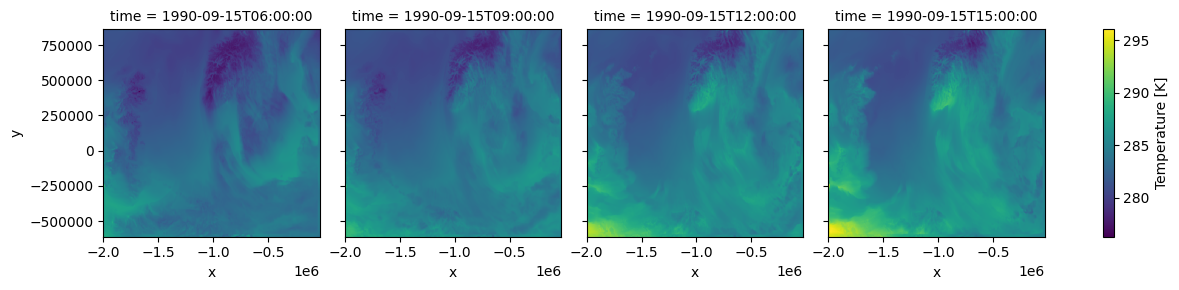

In [14]:
da_t.plot(col="time", col_wrap=4)

In [16]:
import numpy
ds_pl.sel(time=slice(numpy.datetime64('1999-05-16T00:00:00.000000000'), numpy.datetime64('1999-05-18T00:00:00.000000000')))

<xarray.Dataset>
Dimensions:            (level: 1, time: 15, y: 589, x: 789)
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * level              (level) int64 1000
    lon                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * time               (time) datetime64[ns] 1999-05-16 ... 1999-05-17T21:00:00
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables:
    ciwc               (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    cwat               (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    r                  (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    t                  (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    tw                 (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    u                  (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    v                  (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
    z                  (level, time, y, x) float64 dask.array<chunksize=(1, 15, 128, 128), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

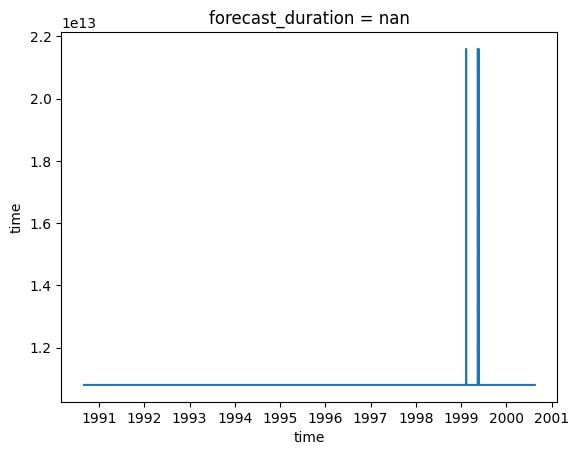

In [18]:
ds_pl.time.diff(dim="time").plot()

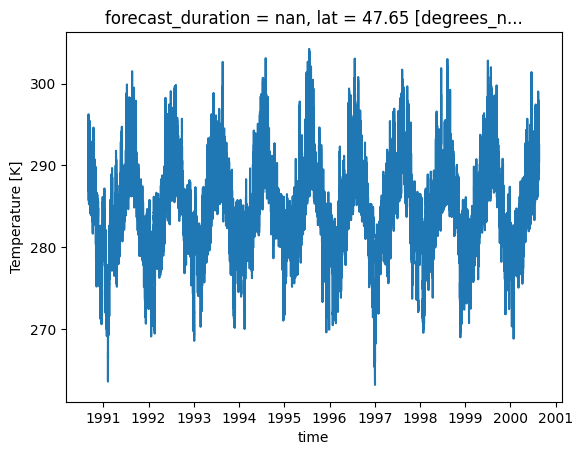

In [20]:
ds_pl.isel(x=0, y=0).t.plot()

# Looking at height-level data

In [4]:
ds_hl = xr.open_zarr(fp_root / "height_levels.zarr")
ds_hl

/home/lcd/git-repos/danra_to_zarr/.venv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


<xarray.Dataset>
Dimensions:            (y: 589, x: 789, level: 1, time: 29115)
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * level              (level) int64 100
    lon                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-01 ... 2000-08-19
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables:
    r                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    t                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    u                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
    v                  (level, time, y, x) float64 dask.array<chunksize=(1, 128, 128, 128), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

In [5]:
import numpy as np

In [6]:
vals, counts = np.unique(ds_hl.time.values, return_counts=True)

In [7]:
vals[counts > 1]

array([], dtype='datetime64[ns]')

In [8]:
da_temp_100m = ds_hl.t

In [9]:
da_temp_100m.sel(time=slice("1991-01-01T03:00", "1991-01-01T18:00"))

<xarray.DataArray 't' (level: 1, time: 6, y: 589, x: 789)>
dask.array<getitem, shape=(1, 6, 589, 789), dtype=float64, chunksize=(1, 6, 128, 128), chunktype=numpy.ndarray>
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * level              (level) int64 100
    lon                (y, x) float64 dask.array<chunksize=(128, 128), meta=np.ndarray>
  * time               (time) datetime64[ns] 1991-01-01T03:00:00 ... 1991-01-...
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Attributes:
    level_type:   heightAboveGround
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  heightAboveGround
    units:        K

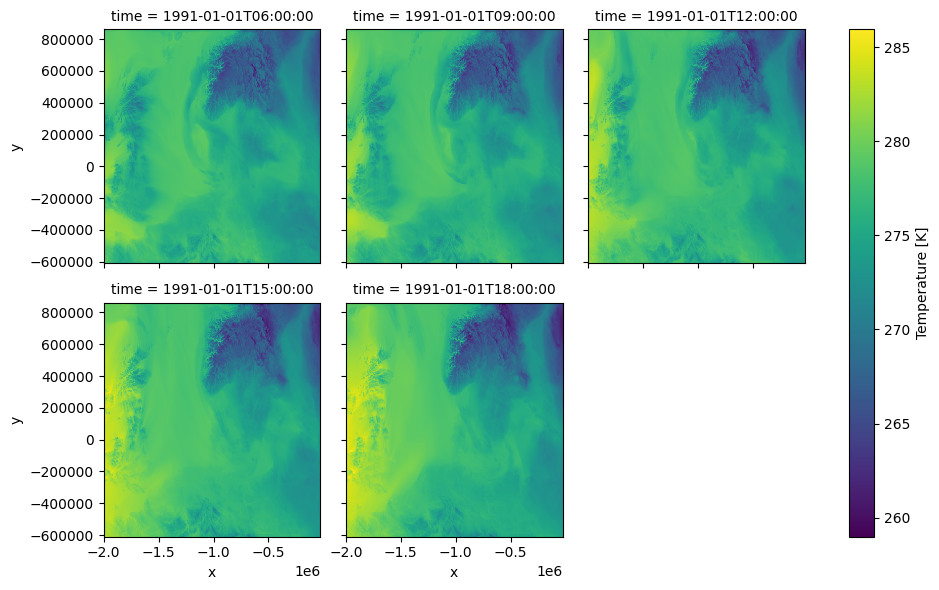

In [10]:
da_temp_100m.sel(time=slice("1991-01-01T06:00", "1991-01-01T18:00")).plot(col="time", col_wrap=3)

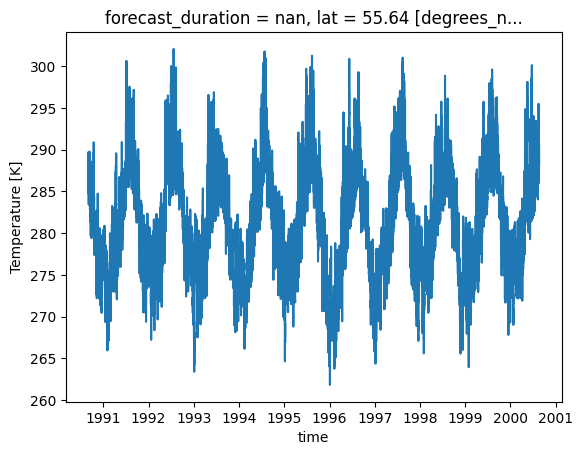

In [11]:
da_temp_100m.sel(x=-1.0e6, y=0.0, method="nearest").plot()

# Looking at single-level data

In [12]:
ds_sl = xr.open_zarr(fp_root / "single_levels.zarr")
ds_sl

<xarray.Dataset>
Dimensions:            (time: 2881, y: 589, x: 789)
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-01 ... 1991-08-27
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables: (12/29)
    cape_column        (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    cb_column          (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    ct_column          (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    grpl_column        (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    hcc0m              (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    icei0m             (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    ...                 ...
    t0m                (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    t2m                (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    u10m               (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    v10m               (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    vis0m              (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    xhail0m            (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
Attributes:
    description:  All variables for one-year period on reduced levels

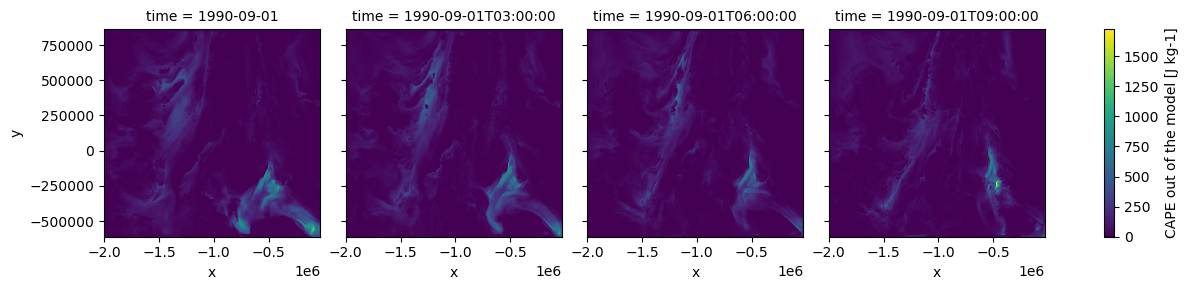

In [13]:
ds_sl.cape_column.isel(time=slice(0, 4)).plot(col="time")